<a href="https://colab.research.google.com/github/shuklasuraj1000/Assignment/blob/main/Assignment_15_OCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

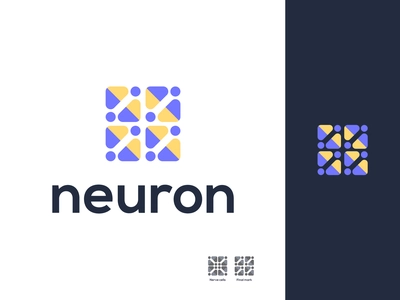


**Algerian forest fires dataset**

> **Life cycle of Machine learning Project**
1.   Data ingestion
2.   EDA
3.   FE
4.   ML Model
5.   List item

> **Data Set Information:**
1.   The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2.   122 instances for each region.
3.   The period from June 2012 to September 2012.
4.   The dataset includes 11 attribues and 1 output attribue (class)
5.   The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

> **Source:**
1.   ***URL:*** https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

> **Attribute Information:**
1.   Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2.   Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3.   RH : Relative Humidity in %: 21 to 90
4.   Ws :Wind speed in km/h: 6 to 29
5.   Rain: total day in mm: 0 to 16.8
FWI Components
6.   Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7.   Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
3.   Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€











**Import Data and Required Packages**

`Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Import the CSV Data from Git as Pandas DataFrame**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shuklasuraj1000/EDA_DATA/main/Algerian_forest_fires_dataset_UPDATE.csv")

**Exploring schemas/Features**

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region


**Shape and Size of Data**

In [4]:
df.shape

(244, 15)

**Checking data tpye and checking null**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


**Observation:** Most of feature in numeric, one null value in 'classes, last 3 feature are object type change is required.

**Quick observation for outlier:**

In [6]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


**Observation:** By seeing 25%, 50%  and 75% of all nemeric features, quically we can say that there might be some outlier in 'DMC' , 'ISI' , and 'BUI' 
**max -side**, and 'WS', 'FFMC', 'DMC' and 'BUI' **min-side**.

**Dropping Null row:**

In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
df.rename(columns={'Classes  ':'Classes'}, inplace=True)

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes Region


In [12]:
df_updated=df.drop(165, axis=0)

In [13]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 30.4+ KB


In [14]:
df_updated['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '14.1', '9.1', '13', '17.3', '30',
       '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4', '15.2',
  

In [15]:
df_updated['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

**Data type casting:**

In [16]:
df_updated['FWI']=df_updated['FWI'].astype(float)

In [17]:
df_updated['DC']=df_updated['DC'].astype(float)

**Encoding Categorical Value:**

In [18]:
df_updated['Region'].unique()

array(['Bejaia Region', 'Sidi-Bel Abbes Region'], dtype=object)

In [19]:
df_updated['Region']=df_updated['Region'].replace({'Bejaia Region':1,'Sidi-Bel Abbes Region':0 })

In [20]:
df_updated

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


**DATA FOR ANALYSIS:**

In [21]:
df_final=df_updated.drop(columns='Classes')
df_final.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


**Data feature segregation:**

In [264]:
dependent_feature=df_final['Temperature']
df_f=df_final.copy()
test_corr_features=df_f.drop(columns=['year'])
independent_features=df_f.drop(columns=['Temperature', 'year'])

In [23]:
independent_features.head(10)

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
5,6,6,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,8,6,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,9,6,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,1
9,10,6,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,1


**EXPLORING DATA**

**Univariate Analysis**

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

**independent_feature**

In [24]:
ind_features=independent_features.columns

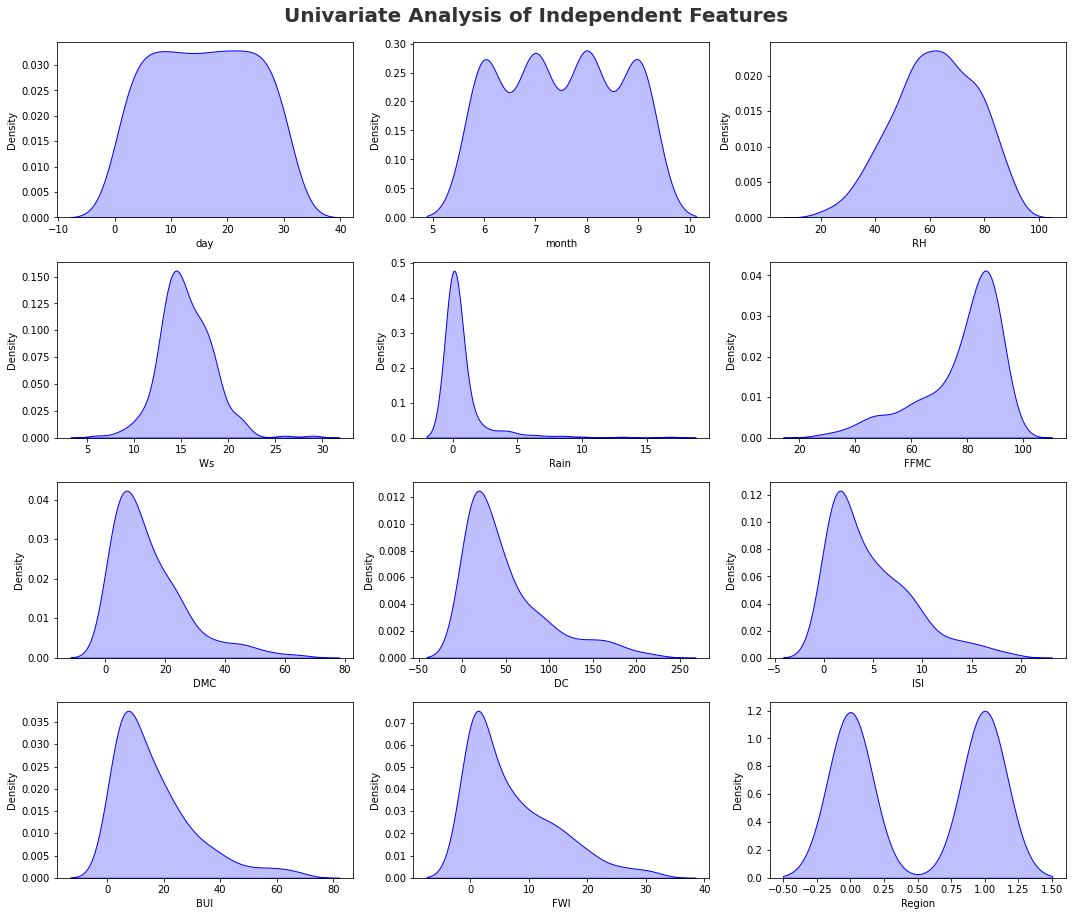

In [25]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Independent Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(ind_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=independent_features[ind_features[i]],shade=True, color='b')
    plt.xlabel(ind_features[i])
    plt.tight_layout()

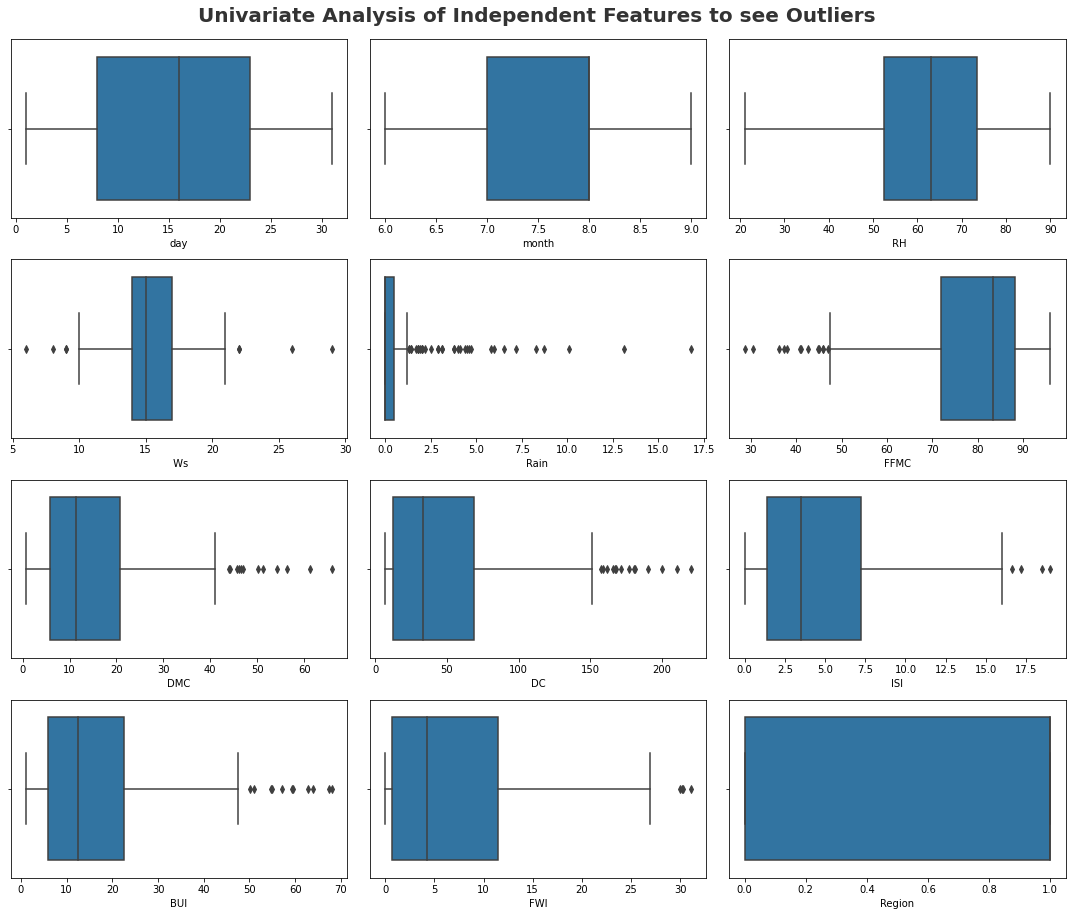

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Independent Features to see Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(ind_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=independent_features[ind_features[i]], data=independent_features)
    plt.xlabel(ind_features[i])
    plt.tight_layout()


**Observation:** As per earliar pre-speculation, outliers can be seen here in the above shown box-plot too. That need to be handled as for further proceedings.

**Multivariate Analysis**

Multivariate analysis is the analysis of more than one variable.

*Check Multicollinearity in Numerical features*

In [241]:
test_corr_features[(list(test_corr_features.columns)[1:])].corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
month,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.001857
Temperature,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.269555
RH,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.402682
Ws,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.181160
Rain,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.040013
FFMC,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.222241
DMC,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.192089
DC,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.078734
ISI,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.263197
BUI,0.085073,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.089408


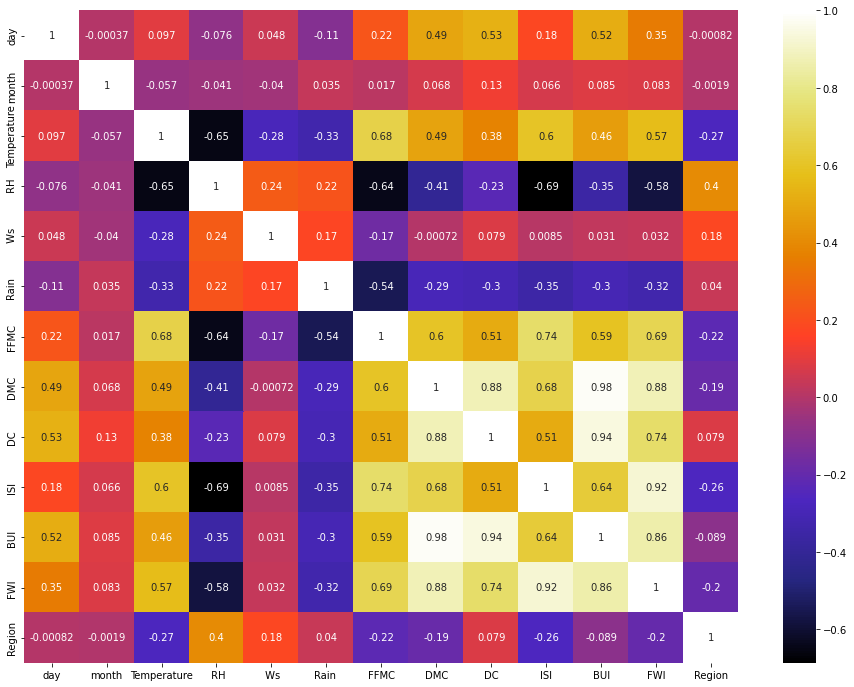

In [242]:
plt.figure(figsize = (16,12))
sns.heatmap(test_corr_features.corr(), cmap="CMRmap", annot=True)
plt.show()

**Observation:**
Dependent feature "Tempreture" is some what highly correlated with 'RH, 'FFMC, 'ISI' 'FWI' and 'DMC.

**Pair Plot:**

Pairwise relationship between different independent features in a dataset.

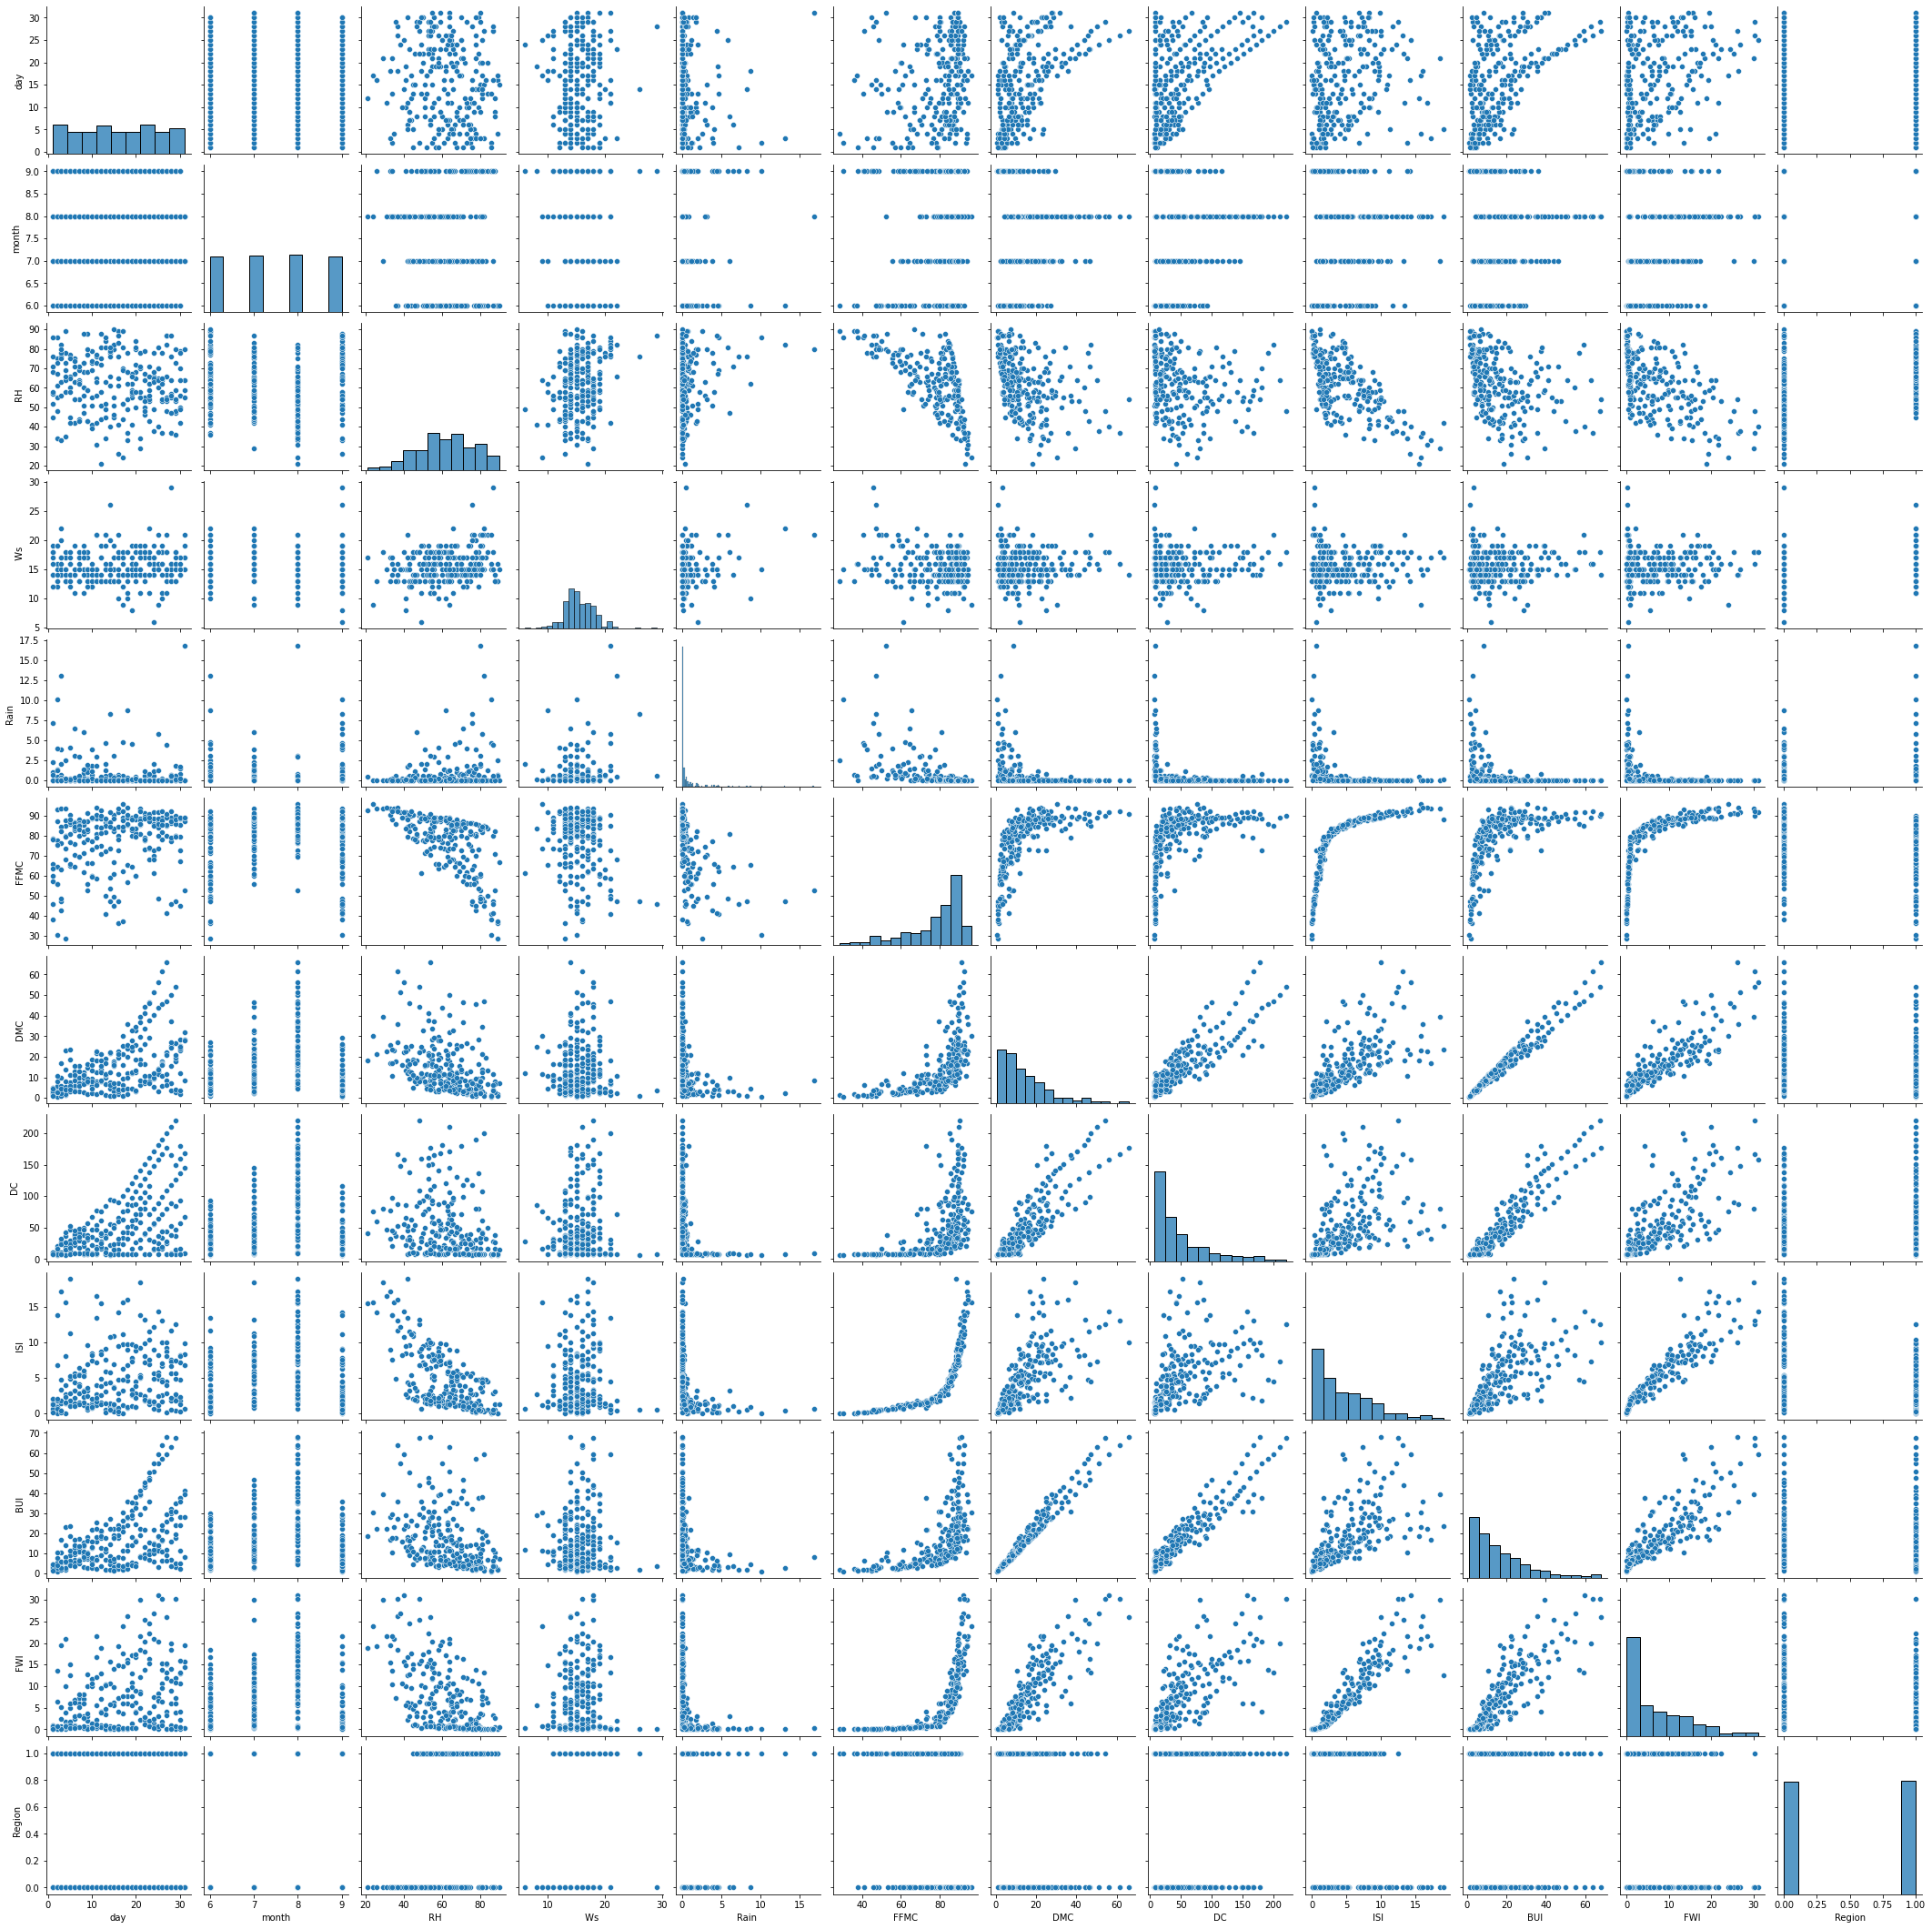

In [29]:
sns.pairplot(independent_features)

**Regplot:**

visualize the linear relationship as determined through regression.

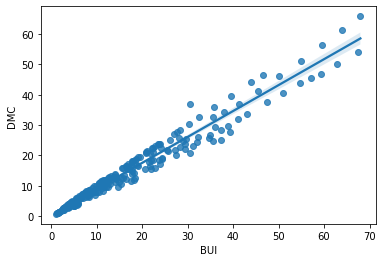

In [31]:
sns.regplot(x="BUI",y="DMC",data=independent_features)

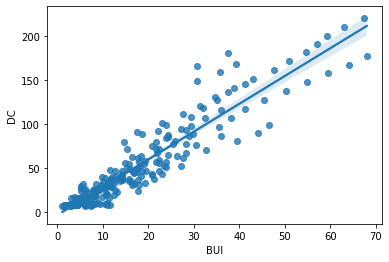

In [32]:
sns.regplot(x="BUI",y="DC",data=independent_features)

**Observation:**  'BUI , 'DMC, and 'DC' are positively highly correlated  **[0.98, 0.94]** (multi-colinearity). We can pick either one feature for ML model.

# **ML MODEL BUILDING:**

In [34]:
from sklearn.model_selection import train_test_split

In [325]:
test_corr_features.keys()

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

In [326]:
X=test_corr_features.drop(columns=['day', 'month', 'Temperature',  ' Ws', 'Rain ','DC', 'BUI',  'Region', 'DMC'])
X

,RH,FFMC,ISI,FWI
0,57,65.7,1.3,0.5
1,61,64.4,1.0,0.4
2,82,47.1,0.3,0.1
3,89,28.6,0.0,0.0
4,77,64.8,1.2,0.5
...,...,...,...,...
239,65,85.4,4.5,6.5
240,87,41.1,0.1,0.0
241,87,45.9,0.4,0.2
242,54,79.7,1.7,0.7


In [327]:
Y=dependent_feature
Y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

**DATA splitting among Training and Test data:**

In [328]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.60, random_state=25)

**Standardize or feature scaling the datasets:**

In [329]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [330]:
X_train=scaler.fit_transform(X_train)
X_train.shape

(97, 4)

*tranforming test test data without fit to avoid data leakage:*

In [331]:
X_test=scaler.transform(X_test)
X_test.shape

(146, 4)

# **Model Training:**

# **Linear Regression**

In [332]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [333]:
regression.fit(X_train,Y_train)

LinearRegression()

**Print the coefficients and the intercept**

In [334]:
print(regression.coef_)

[-1.57848037  1.51372362 -1.94307029  1.84898328]


In [335]:
print(regression.intercept_)

31.88659793814433


**Prediction for the test data**

In [336]:
reg_pred=regression.predict(X_test)
reg_pred

array([30.77454285, 28.55712237, 35.80643942, 31.31809194, 26.19370907,
       32.7031328 , 29.2651414 , 34.71597055, 27.31861948, 31.24125503,
       33.2635773 , 27.27548159, 32.15676335, 34.31780648, 29.76103167,
       33.05517023, 35.10146255, 27.65007878, 36.10117266, 29.48620567,
       33.62235669, 33.19230023, 30.71750782, 35.87775192, 34.96723715,
       30.35946006, 36.74566596, 32.70584635, 30.30514522, 33.70479909,
       37.01330174, 31.89946513, 33.21987456, 32.16419582, 35.16402845,
       29.55049681, 32.21037556, 31.61399151, 33.88419628, 33.70126602,
       34.77879611, 28.70280889, 33.90088374, 29.35309407, 31.93881186,
       32.49736179, 27.51734013, 33.1856536 , 36.72666296, 27.89824491,
       30.6173055 , 27.93817483, 34.06406448, 29.14854806, 33.79269859,
       31.64150257, 37.65705662, 34.09437567, 31.90259985, 34.69023544,
       33.24226717, 35.24385781, 34.4154131 , 32.71160701, 33.87197125,
       30.89416039, 30.48591888, 32.36829374, 25.27033504, 32.40

## **Assumptions Of Linear Regression**

Text(0, 0.5, 'Test Predicted Data')

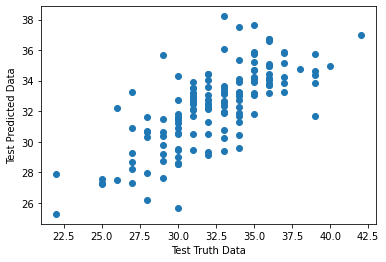

In [337]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

**Residuals:**

In [338]:
residuals=Y_test-reg_pred
residuals

40     2.225457
19     1.442878
149    1.193561
66     0.681908
240    1.806291
         ...   
164    4.612383
55     2.213512
33     2.727102
27    -2.412651
182    2.764687
Name: Temperature, Length: 146, dtype: float64

In [339]:
type(Y_test)

pandas.core.series.Series

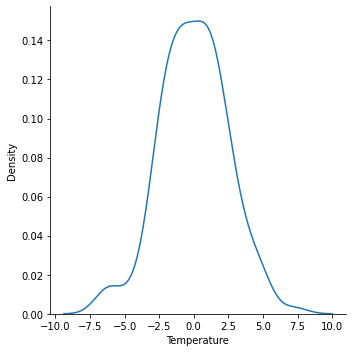

In [340]:
sns.displot(residuals,kind="kde")

**Observation:**
Few outliers are present.

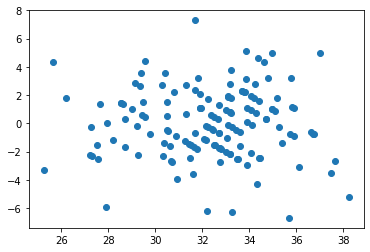

In [341]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

**Performance Metrics:**

In [342]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [343]:
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

5.8951923682568195
1.933619813411431
2.4280017232812705


**Observation:**
MSE and MAE in both error approching to zero.

## **R square and adjusted R square:**

In [344]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.5261045053635343


In [345]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.5126606615440601

**Observation:** Model is not performing good with Linear regression model.

# **Ridge:**

In [346]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [347]:
ridge.fit(X_train,Y_train)

Ridge()

In [348]:
## print the coefficients and the intercept
print(ridge.coef_)

[-1.51350647  1.47282895 -1.5870371   1.55946161]


In [349]:
print(ridge.intercept_)

31.88659793814433


In [350]:
reg_pred=ridge.predict(X_test)
reg_pred

array([30.83335232, 28.60840431, 35.83782047, 31.40969482, 26.26956167,
       32.61086531, 29.31317065, 34.58075667, 27.35033482, 31.2361171 ,
       33.35237474, 27.34251238, 32.13474858, 34.23731663, 29.77738905,
       33.11865817, 35.03628137, 27.68838705, 36.27597665, 29.49564003,
       33.5491225 , 33.03363053, 30.82177363, 35.95991597, 34.90372595,
       30.43127868, 36.53528872, 32.72799689, 30.39929042, 33.74569067,
       37.11836742, 31.857507  , 33.18068494, 32.22528979, 35.23844829,
       29.67538042, 32.09171781, 31.59753775, 33.88619935, 33.59565014,
       35.0675586 , 28.73798971, 33.85094425, 29.35210438, 32.03333169,
       32.48749312, 27.55923445, 33.30224525, 36.35914982, 27.93170365,
       30.71194656, 27.98572087, 34.08822879, 29.20616435, 33.80743543,
       31.65244609, 37.38769903, 34.11417102, 31.99019979, 34.55624471,
       33.32506132, 34.98151649, 34.31733528, 32.85607696, 33.94981609,
       30.939697  , 30.50806103, 32.32131918, 25.36164147, 32.34

### **Assumptions Of Ridge Regression:**

Text(0, 0.5, 'Test Predicted Data')

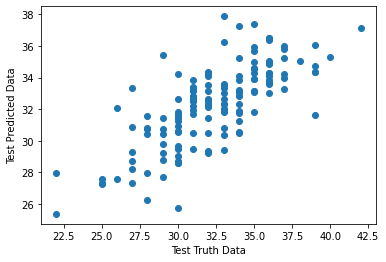

In [351]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [352]:
## residuals
residuals=Y_test-reg_pred
residuals

40     2.166648
19     1.391596
149    1.162180
66     0.590305
240    1.730438
         ...   
164    4.657010
55     2.131991
33     2.626538
27    -2.337269
182    2.800144
Name: Temperature, Length: 146, dtype: float64

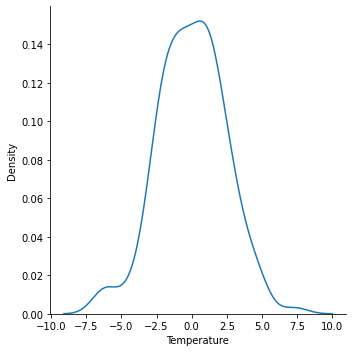

In [353]:
sns.displot(residuals,kind="kde")

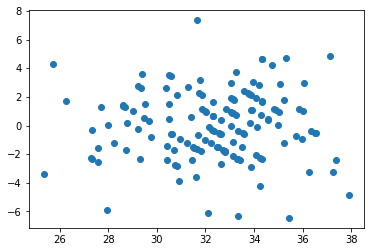

In [354]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [355]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

5.668741041963109
1.9023165516147118
2.380911808942765


## **R square and adjusted R square:**

In [356]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.5443081968771283


In [357]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.5313807698381816

# **Lasso**

In [358]:
from sklearn import linear_model
reg = linear_model.Lasso()

In [359]:
reg

Lasso()

In [360]:
reg.fit(X_train,Y_train)

Lasso()

In [361]:
## print the coefficients and the intercept
print(reg.coef_)

[-0.69731028  0.90030255  0.          0.        ]


In [362]:
print(reg.intercept_)

31.88659793814433


In [363]:
## PRediction for the test data
reg_pred=reg.predict(X_test)
reg_pred

array([31.5754359 , 30.09111719, 34.12796368, 31.94499736, 28.62160016,
       32.05253892, 30.53785572, 33.17641354, 29.14197457, 31.59087452,
       33.05596507, 29.30518169, 32.09568613, 32.87213173, 30.66956468,
       32.88680923, 33.46968321, 29.41702556, 34.73766096, 30.49699184,
       32.62149651, 32.1114973 , 31.68993566, 34.25283864, 33.34999586,
       31.3489681 , 33.76282871, 32.48789277, 31.35782107, 33.06292326,
       34.96058758, 31.85365553, 32.55380934, 32.37681002, 33.94843264,
       31.08808187, 31.66084504, 31.78874843, 33.05077747, 32.65603912,
       34.30230711, 30.0806178 , 32.85910063, 30.3564299 , 32.34391382,
       32.30659114, 29.33807789, 33.12099634, 33.2260062 , 29.52886942,
       31.60491509, 29.64779566, 33.12883984, 30.48231434, 33.00307958,
       31.91792569, 34.05597421, 33.15224613, 32.23029936, 33.00915248,
       32.90768381, 32.81228805, 32.88946512, 32.85302774, 33.21816271,
       31.6031445 , 31.25875993, 32.11833131, 28.0255709 , 32.09

## **Assumptions Of LASSO:**

Text(0, 0.5, 'Test Predicted Data')

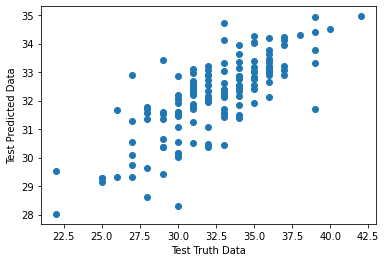

In [364]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [365]:
## residuals
residuals=Y_test-reg_pred
residuals

40     1.424564
19    -0.091117
149    2.872036
66     0.055003
240   -0.621600
         ...   
164    5.696941
55     2.835608
33     1.580689
27    -1.062923
182    3.924931
Name: Temperature, Length: 146, dtype: float64

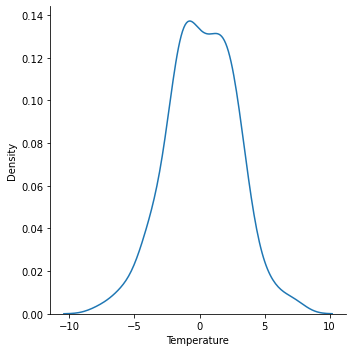

In [366]:
sns.displot(residuals,kind="kde")

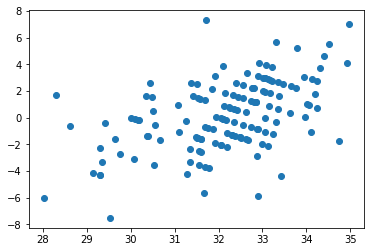

In [367]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [368]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

6.846544533884503
2.1039764125299936
2.6165902495202613


## **R square and adjusted R square:**

In [369]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.44962837414664647


In [370]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.43401499468981375

# **Elastic-Net:**

In [371]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet()
reg 

ElasticNet()

In [372]:
reg.fit(X_train,Y_train)

ElasticNet()

In [373]:
## print the coefficients and the intercept
print(reg.coef_)

[-0.74874157  0.76730251  0.06979168  0.24668903]


In [374]:
print(reg.intercept_)

31.88659793814433


In [375]:
## PRediction for the test data
reg_pred=reg.predict(X_test)
reg_pred

array([31.32188566, 29.91976055, 34.64922642, 31.85780105, 28.5645779 ,
       32.15837329, 30.34122859, 33.13653666, 29.10315758, 31.36746562,
       33.06262829, 29.19327034, 31.8736593 , 33.34709133, 30.54318989,
       32.8008738 , 33.80735289, 29.32364812, 35.3626904 , 30.34482118,
       32.82952116, 32.23120977, 31.45346932, 34.93903569, 33.76963827,
       31.09484533, 34.48683236, 32.50247589, 31.23177662, 33.25714276,
       35.76759198, 31.6459555 , 32.63657474, 32.21013553, 34.35250303,
       30.80477284, 31.57959669, 31.59171759, 33.22164962, 32.62992756,
       34.98065644, 29.95826424, 33.0743036 , 30.22838752, 32.21830886,
       32.20718356, 29.25636324, 33.08951822, 33.94225282, 29.46305819,
       31.34354431, 29.53289779, 33.50009624, 30.30628787, 33.24169993,
       31.66763005, 34.88723682, 33.48252923, 32.23201863, 33.30482695,
       33.1378089 , 33.28807019, 33.32605579, 32.97225301, 33.54427473,
       31.3326526 , 30.9964115 , 31.96814372, 28.06533204, 31.94

## **Assumptions Of Elastic Net:**

Text(0, 0.5, 'Test Predicted Data')

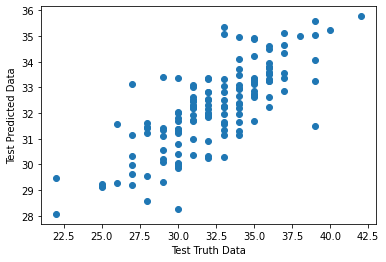

In [376]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [377]:
## residuals
residuals=Y_test-reg_pred
residuals

40     1.678114
19     0.080239
149    2.350774
66     0.142199
240   -0.564578
         ...   
164    5.760452
55     2.481854
33     1.848165
27    -1.317049
182    3.638549
Name: Temperature, Length: 146, dtype: float64

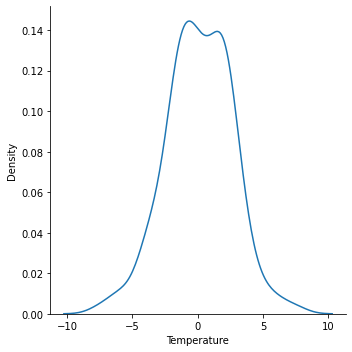

In [378]:
sns.displot(residuals,kind="kde")

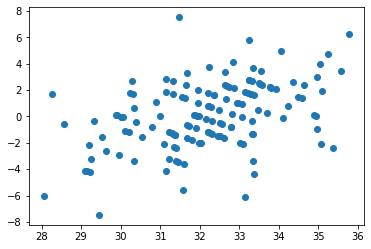

In [379]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [380]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

6.290411934612587
1.9964637749422547
2.508069363995459


## **R square and adjusted R square:**

In [381]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.4943340795337223


In [382]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.47998894703822514